# Proyecto 4
## Tratamiento de datos

In [23]:
import pandas as pd
dataset = pd.read_csv('car_prices.csv')
dataset.head()

,Unnamed: 0,mileage_per_year,model_year,price,sold
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


In [24]:
mapa = {
    'mileage_per_year' : 'millas_por_anio',
    'model_year' : 'anio_del_modelo',
    'price': 'precio',
    'sold': 'vendido' 
}

dataset = dataset.rename(columns=mapa)
dataset.sample(10)

,Unnamed: 0,millas_por_anio,anio_del_modelo,precio,vendido
4695,4695,11898,1999,87140.04,no
1378,1378,15628,2005,91600.66,no
2749,2749,17337,2000,57760.91,yes
1079,1079,18773,2011,49979.27,yes
2842,2842,22256,2008,28025.78,yes
9768,9768,12497,2013,100390.74,no
8488,8488,14704,2008,45340.26,yes
6761,6761,27107,2000,36445.40,yes
6134,6134,15196,2006,84977.10,no
5583,5583,9819,2005,44566.21,yes


In [25]:
cambio = {
    'no':0,
    'yes':1 
}
dataset.vendido = dataset.vendido.map(cambio)
dataset.sample(10)

,Unnamed: 0,millas_por_anio,anio_del_modelo,precio,vendido
6817,6817,9537,2001,45572.03,0
6554,6554,12717,2006,62739.53,0
4571,4571,10222,2001,67412.38,0
49,49,11442,2000,102184.72,0
9521,9521,16163,2006,40717.12,1
2884,2884,14935,2009,107414.65,1
5091,5091,15327,2003,89536.02,0
8887,8887,17044,2005,96929.39,0
9920,9920,8562,2003,79209.50,1
5235,5235,9615,2000,41841.70,1


In [26]:
from datetime import datetime
anio_actual = datetime.today().year
dataset['edad_carro'] = anio_actual - dataset.anio_del_modelo
dataset.sample(10)

,Unnamed: 0,millas_por_anio,anio_del_modelo,precio,vendido,edad_carro
9218,9218,16039,2003,109135.21,1,20
4464,4464,8405,2010,53840.48,1,13
1015,1015,18881,2004,34440.02,1,19
4201,4201,13278,2000,49892.97,1,23
7563,7563,8746,2001,88522.01,1,22
2188,2188,9224,2005,65633.06,0,18
1064,1064,22331,2002,25112.04,1,21
6120,6120,12692,2005,37130.46,1,18
7032,7032,16574,1998,72636.87,0,25
7270,7270,14051,2005,41450.45,1,18


In [27]:
dataset['km_por_anio'] = dataset.millas_por_anio * 1.60934
dataset.sample(10)

,Unnamed: 0,millas_por_anio,anio_del_modelo,precio,vendido,edad_carro,km_por_anio
274,274,10572,2009,50146.34,0,14,17013.94248
9394,9394,11910,2011,96097.48,0,12,19167.23940
4839,4839,6781,2004,104038.84,0,19,10912.93454
8526,8526,4670,2014,101111.37,1,9,7515.61780
806,806,10795,2002,75393.38,0,21,17372.82530
3640,3640,18441,2008,89783.82,0,15,29677.83894
6608,6608,10940,1998,44981.62,1,25,17606.17960
2954,2954,13606,2000,47842.34,1,23,21896.68004
7373,7373,14534,2006,44668.21,0,17,23390.14756
6367,6367,27872,2009,42863.53,1,14,44855.52448


In [28]:
dataset = dataset.drop(columns=['Unnamed: 0', 'millas_por_anio', 'anio_del_modelo'], axis=1)
dataset.sample(10)

,precio,vendido,edad_carro,km_por_anio
4877,53464.33,0,25,23789.26388
7657,32131.38,1,23,19720.85236
4542,46348.57,1,15,20974.52822
5267,103356.45,1,23,10817.98348
854,9293.94,1,23,20525.52236
1459,53354.29,1,14,30500.21168
5238,48178.23,1,19,18220.94748
7739,51224.27,1,25,15414.25852
7941,46031.72,1,15,14315.07930
6059,111982.15,1,22,18428.55234


## Dummy classifier y SVC

In [33]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.model_selection import train_test_split
# Usando Standar Scaler
x = dataset[['edad_carro', 'km_por_anio','precio']]
y = dataset.vendido

SEED = 42
np.random.seed(SEED)

raw_x_train, raw_x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,stratify=y)
print(f'Entrenar con {len(raw_x_train)} elementos y se prueba con {len(raw_x_test)} elementos')

scaler = StandardScaler()
scaler.fit(raw_x_train)
x_train = scaler.transform(raw_x_train)
x_test = scaler.transform(raw_x_test)

model = SVC()
model.fit(x_train, y_train)
previsiones = model.predict(x_test)

tasa_de_acierto = accuracy_score(y_test, previsiones)
print(f'La tasa de acierto fue de: {round(tasa_de_acierto*100,2)}%')

Entrenar con 7500 elementos y se prueba con 2500 elementos
La tasa de acierto fue de: 76.04%


In [35]:
from sklearn.dummy import DummyClassifier

dummy = DummyClassifier(strategy='stratified')
dummy.fit(x_train, y_train)
exactitud = dummy.score(x_test, y_test)*100
print(f'La exactitud del clasificador Dummy stratified fue: {round(exactitud, 2)}%')

La exactitud del clasificador Dummy stratified fue: 50.36%


In [36]:
from sklearn.dummy import DummyClassifier

dummy = DummyClassifier(strategy='most_frequent')
dummy.fit(x_train, y_train)
exactitud = dummy.score(x_test, y_test)*100
print(f'La exactitud del clasificador Dummy most_frequent fue: {round(exactitud, 2)}%')

La exactitud del clasificador Dummy most_frequent fue: 58.0%


## Árboles de decisión y visualización de reglas de decisión

In [41]:
from sklearn.tree import DecisionTreeClassifier

x = dataset[['edad_carro', 'km_por_anio','precio']]
y = dataset.vendido

SEED = 42
np.random.seed(SEED)

raw_x_train, raw_x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,stratify=y)
print(f'Entrenar con {len(raw_x_train)} elementos y se prueba con {len(raw_x_test)} elementos')

scaler = StandardScaler()
scaler.fit(raw_x_train)
x_train = scaler.transform(raw_x_train)
x_test = scaler.transform(raw_x_test)

model = DecisionTreeClassifier(max_depth=3)
model.fit(x_train, y_train)
previsiones = model.predict(x_test)

tasa_de_acierto = accuracy_score(y_test, previsiones)
print(f'La tasa de acierto fue de: {round(tasa_de_acierto*100,2)}%')

Entrenar con 7500 elementos y se prueba con 2500 elementos
La tasa de acierto fue de: 78.04%


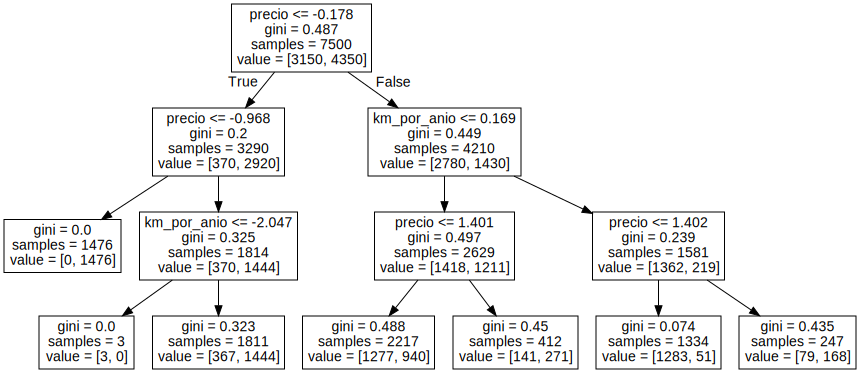

In [42]:
from sklearn.tree import export_graphviz
import graphviz

features = x.columns
dot_data = export_graphviz(model, feature_names=features)
grafico = graphviz.Source(dot_data)
grafico

In [44]:
from sklearn.tree import DecisionTreeClassifier

x = dataset[['edad_carro', 'km_por_anio','precio']]
y = dataset.vendido

SEED = 42
np.random.seed(SEED)

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,stratify=y)
print(f'Entrenar con {len(x_train)} elementos y se prueba con {len(x_test)} elementos')

model = DecisionTreeClassifier(max_depth=3)
model.fit(x_train, y_train)
previsiones = model.predict(x_test)

tasa_de_acierto = accuracy_score(y_test, previsiones)
print(f'La tasa de acierto fue de: {round(tasa_de_acierto*100,2)}%')

Entrenar con 7500 elementos y se prueba con 2500 elementos
La tasa de acierto fue de: 78.04%


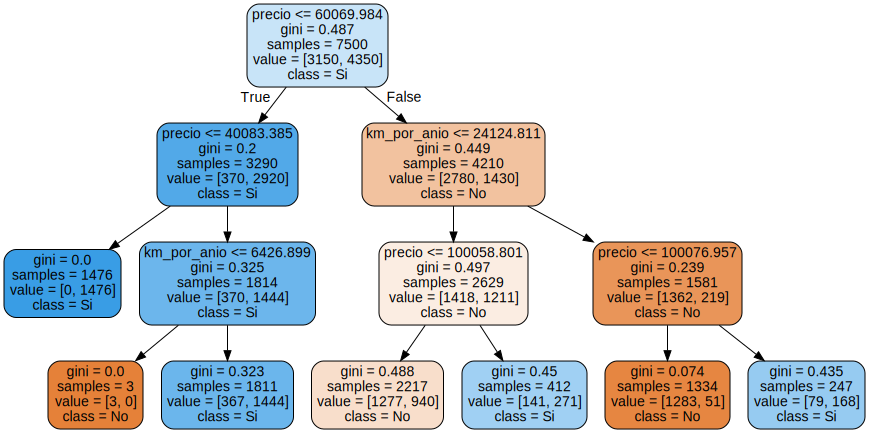

In [46]:
from sklearn.tree import export_graphviz
import graphviz

features = x.columns
dot_data = export_graphviz(model, feature_names=features, filled=True, rounded=True, class_names=['No', 'Si'])
grafico = graphviz.Source(dot_data)
grafico